In [81]:
# Problem - looking for a area to buy a house in los Angeles with less crimes 

In [82]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
%matplotlib inline
import seaborn as sns 

In [83]:
from IPython.display import display


In [84]:
from matplotlib import colormaps


In [85]:
data=pd.read_csv("Crime_Data_from_2020_to_Present - Copy.csv")
df=data.copy()
pd.set_option("display.max_columns",None)

In [86]:
df.head()

,DR_NO,Date Rptd,DATE OCC,TIME OCC,AREA,AREA NAME,Rpt Dist No,Part 1-2,Crm Cd,Crm Cd Desc,Mocodes,Vict Age,Vict Sex,Vict Descent,Premis Cd,Premis Desc,Weapon Used Cd,Weapon Desc,Status,Status Desc,Crm Cd 1,Crm Cd 2,Crm Cd 3,Crm Cd 4,LOCATION,Cross Street,LAT,LON
0,190326475,03/01/2020 12:00:00 AM,03/01/2020 12:00:00 AM,2130,7,Wilshire,784,1,510,VEHICLE - STOLEN,NaN,0,M,O,101.0,STREET,NaN,NaN,AA,Adult Arrest,510.0,998.0,NaN,NaN,1900 S LONGWOOD AV,NaN,34.0375,-118.3506
1,200106753,02/09/2020 12:00:00 AM,02/08/2020 12:00:00 AM,1800,1,Central,182,1,330,BURGLARY FROM VEHICLE,1822 1402 0344,47,M,O,128.0,BUS STOP/LAYOVER (ALSO QUERY 124),NaN,NaN,IC,Invest Cont,330.0,998.0,NaN,NaN,1000 S FLOWER ST,NaN,34.0444,-118.2628
2,200320258,11/11/2020 12:00:00 AM,11/04/2020 12:00:00 AM,1700,3,Southwest,356,1,480,BIKE - STOLEN,0344 1251,19,X,X,502.0,"MULTI-UNIT DWELLING (APARTMENT, DUPLEX, ETC)",NaN,NaN,IC,Invest Cont,480.0,NaN,NaN,NaN,1400 W 37TH ST,NaN,34.0210,-118.3002
3,200907217,05/10/2023 12:00:00 AM,03/10/2020 12:00:00 AM,2037,9,Van Nuys,964,1,343,SHOPLIFTING-GRAND THEFT ($950.01 & OVER),0325 1501,19,M,O,405.0,CLOTHING STORE,NaN,NaN,IC,Invest Cont,343.0,NaN,NaN,NaN,14000 RIVERSIDE DR,NaN,34.1576,-118.4387
4,200412582,09/09/2020 12:00:00 AM,09/09/2020 12:00:00 AM,630,4,Hollenbeck,413,1,510,VEHICLE - STOLEN,NaN,0,NaN,NaN,101.0,STREET,NaN,NaN,IC,Invest Cont,510.0,NaN,NaN,NaN,200 E AVENUE 28,NaN,34.0820,-118.2130


# Data cleaning 

In [87]:
df.drop(columns=['Crm Cd','Premis Desc','Status','Cross Street','Weapon Used Cd','Weapon Desc'],inplace=True) # duplicate and unwanted columns removed

In [88]:
df.duplicated().value_counts() 

False    1004847
Name: count, dtype: int64

In [89]:
# no duplicate values found

In [90]:
df.shape

(1004847, 22)

In [91]:
df.isnull().sum()

DR_NO                 0
Date Rptd             0
DATE OCC              0
TIME OCC              0
AREA                  0
AREA NAME             0
Rpt Dist No           0
Part 1-2              0
Crm Cd Desc           0
Mocodes          151591
Vict Age              0
Vict Sex         144604
Vict Descent     144616
Premis Cd            16
Status Desc           0
Crm Cd 1             11
Crm Cd 2         935717
Crm Cd 3        1002532
Crm Cd 4        1004783
LOCATION              0
LAT                   0
LON                   0
dtype: int64

 lot of null values found

In [92]:
values = {"Premis Cd": "No Premises Code ","Crm Cd 1":"No Crime Code Given","Vict Sex":"Unknown","Vict Descent":"X","Mocodes":"No Mocodes Given"}
df.fillna(value=values,inplace=True) # filled categorical data 

In [93]:
# lets see the percentage of missing values 
for col in df.columns:
    missing_percentage = np.mean(df[col].isnull())*100
    print("{} - {}%" .format(col,round(missing_percentage,2)))

DR_NO - 0.0%
Date Rptd - 0.0%
DATE OCC - 0.0%
TIME OCC - 0.0%
AREA - 0.0%
AREA NAME - 0.0%
Rpt Dist No - 0.0%
Part 1-2 - 0.0%
Crm Cd Desc - 0.0%
Mocodes - 0.0%
Vict Age - 0.0%
Vict Sex - 0.0%
Vict Descent - 0.0%
Premis Cd - 0.0%
Status Desc - 0.0%
Crm Cd 1 - 0.0%
Crm Cd 2 - 93.12%
Crm Cd 3 - 99.77%
Crm Cd 4 - 99.99%
LOCATION - 0.0%
LAT - 0.0%
LON - 0.0%


null values have been filled for most columns 

But these columns have a lot of null values 

Crm Cd 2 - 93.12%

Crm Cd 3 - 99.77%

Crm Cd 4 - 99.99%

So we are going to drop them because we don't need these columns, we have crm cd 1 that has the main crime codes.

In [94]:
df.drop(columns=['Crm Cd 2','Crm Cd 3','Crm Cd 4'],inplace=True)

In [95]:
# lets check the datatypes and along with data inconsistencies 
df=df.convert_dtypes() #data converted into suitable format 

In [96]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1004847 entries, 0 to 1004846
Data columns (total 19 columns):
 #   Column        Non-Null Count    Dtype  
---  ------        --------------    -----  
 0   DR_NO         1004847 non-null  Int64  
 1   Date Rptd     1004847 non-null  string 
 2   DATE OCC      1004847 non-null  string 
 3   TIME OCC      1004847 non-null  Int64  
 4   AREA          1004847 non-null  Int64  
 5   AREA NAME     1004847 non-null  string 
 6   Rpt Dist No   1004847 non-null  Int64  
 7   Part 1-2      1004847 non-null  Int64  
 8   Crm Cd Desc   1004847 non-null  string 
 9   Mocodes       1004847 non-null  string 
 10  Vict Age      1004847 non-null  Int64  
 11  Vict Sex      1004847 non-null  string 
 12  Vict Descent  1004847 non-null  string 
 13  Premis Cd     1004847 non-null  object 
 14  Status Desc   1004847 non-null  string 
 15  Crm Cd 1      1004847 non-null  object 
 16  LOCATION      1004847 non-null  string 
 17  LAT           1004847 non-n

In [97]:
df.columns = df.columns.str.lower().str.replace(' ', '_') #columns names fixed 

In [98]:
df.head()

,dr_no,date_rptd,date_occ,time_occ,area,area_name,rpt_dist_no,part_1-2,crm_cd_desc,mocodes,vict_age,vict_sex,vict_descent,premis_cd,status_desc,crm_cd_1,location,lat,lon
0,190326475,03/01/2020 12:00:00 AM,03/01/2020 12:00:00 AM,2130,7,Wilshire,784,1,VEHICLE - STOLEN,No Mocodes Given,0,M,O,101.0,Adult Arrest,510.0,1900 S LONGWOOD AV,34.0375,-118.3506
1,200106753,02/09/2020 12:00:00 AM,02/08/2020 12:00:00 AM,1800,1,Central,182,1,BURGLARY FROM VEHICLE,1822 1402 0344,47,M,O,128.0,Invest Cont,330.0,1000 S FLOWER ST,34.0444,-118.2628
2,200320258,11/11/2020 12:00:00 AM,11/04/2020 12:00:00 AM,1700,3,Southwest,356,1,BIKE - STOLEN,0344 1251,19,X,X,502.0,Invest Cont,480.0,1400 W 37TH ST,34.021,-118.3002
3,200907217,05/10/2023 12:00:00 AM,03/10/2020 12:00:00 AM,2037,9,Van Nuys,964,1,SHOPLIFTING-GRAND THEFT ($950.01 & OVER),0325 1501,19,M,O,405.0,Invest Cont,343.0,14000 RIVERSIDE DR,34.1576,-118.4387
4,200412582,09/09/2020 12:00:00 AM,09/09/2020 12:00:00 AM,630,4,Hollenbeck,413,1,VEHICLE - STOLEN,No Mocodes Given,0,Unknown,X,101.0,Invest Cont,510.0,200 E AVENUE 28,34.082,-118.213


In [99]:
# we can see the problem with date reported ,date_occ and time occ

In [100]:
# date extracted and stored in new column 
df['date_reported']=df['date_rptd'].str[:11]
df['date_reported']=pd.to_datetime(df['date_reported'])

In [101]:
# date extracted and stored in new column 
df['date_occ']=df['date_occ'].str[:11]
df['date_occ']=pd.to_datetime(df['date_occ'])

In [102]:

df['time_occ']=df['time_occ'].astype(str).str.extract("(\d+)") #extracting the numerical and storing in same column 
df['time_occ']=df['time_occ'].astype(str).str.zfill(4)     # filled with zero like 630 into 0630
df['time_occ'] = pd.to_datetime(df['time_occ'], format="%H%M").dt.time 

In [103]:
# extracting year from date column

In [104]:
df['year']=df['date_occ'].dt.year
df['year'].value_counts()

year
2022    235252
2023    232353
2021    209871
2020    199846
2024    127525
Name: count, dtype: int64

In [105]:
df['month']=df['date_occ'].dt.month
df['month'].value_counts()

month
1     92673
3     87793
2     86354
10    84128
7     83957
8     83848
4     83515
5     83013
6     81385
9     81012
11    78982
12    78187
Name: count, dtype: int64

In [106]:
# dropping the year 2025 because it can create class imbalance in data 
df.drop(df.loc[df['year']==2025].index,inplace=True) 

# outlier detection 

In [107]:
df['vict_age'].describe()

count    1004847.0
mean     28.919047
std      21.992244
min           -4.0
25%            0.0
50%           30.0
75%           44.0
max          120.0
Name: vict_age, dtype: Float64

# as we can see here that we have outliers in age coulumn and more than 25% data is equal to zero or less than zero and max value is 120   , lets check the data distribution through box plot 

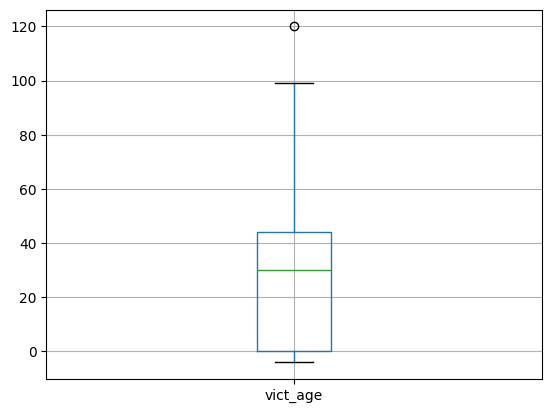

In [108]:
df.boxplot(column='vict_age')
plt.show()

In [109]:
# to prevent bias, filling the outliers with nan values for now, later we will fill them if needed 
df.loc[df['vict_age']<=0,'vict_age']=np.nan


In [110]:
df.loc[df['vict_age']>100,'vict_age']=df['vict_age'].median() # sinle outlier above age 100 filled with median 

# EDA

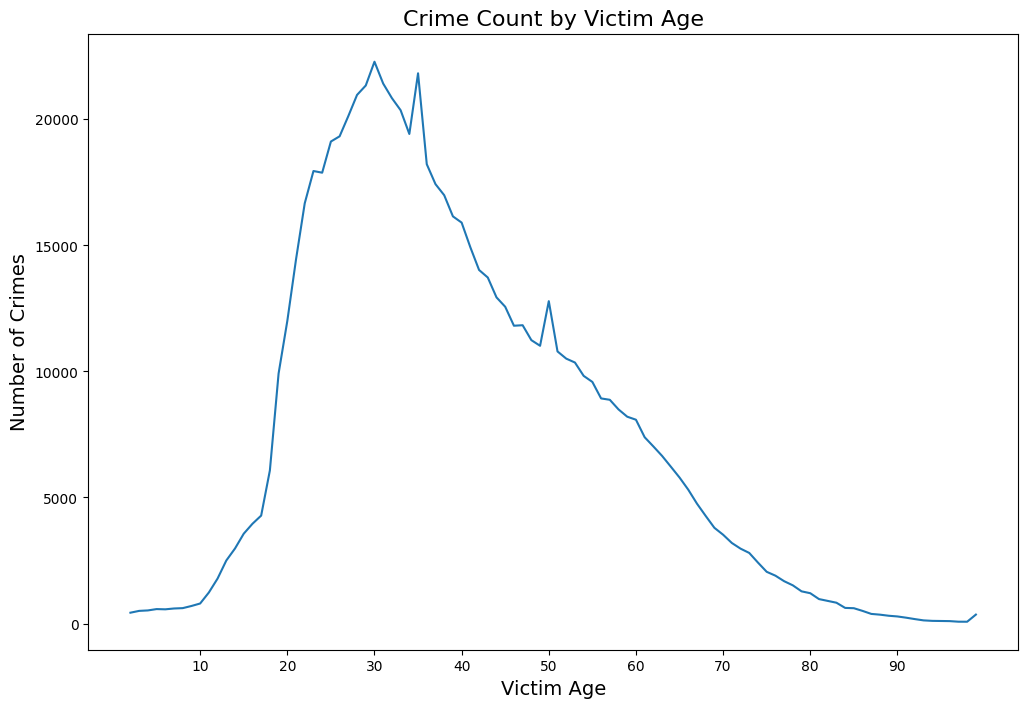

In [111]:
# although we have lot of null values in age data it is just to get an idea reagarding age crimes  

age_count=df[['dr_no','vict_age']].groupby(by="vict_age",as_index=False).count()
plt.figure(figsize=(12, 8))
sns.lineplot(age_count,x='vict_age',y='dr_no')
plt.xlabel("Victim Age", fontsize=14)
plt.ylabel("Number of Crimes", fontsize=14)
plt.title("Crime Count by Victim Age", fontsize=16)
plt.xticks(range(10,100,10))
plt.show()

# more crime happen to the vict-age  from 20 to 60

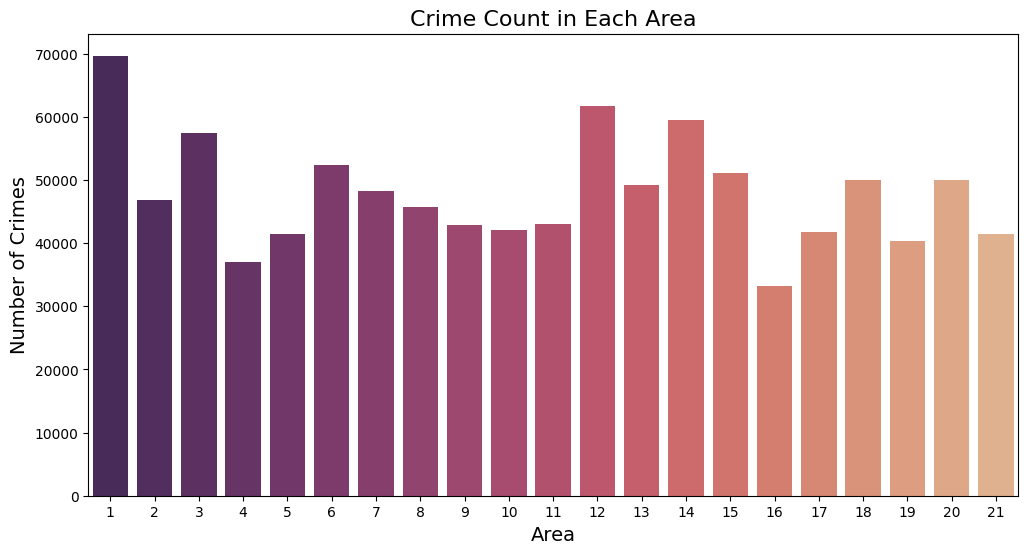

In [112]:
# Count the number of crimes in each area
crime_counts = df['area'].value_counts().sort_values(ascending=False)

plt.figure(figsize=(12, 6))
sns.barplot(x=crime_counts.index, y=crime_counts.values, palette="flare_r",hue=crime_counts.index,legend=False)

plt.xlabel("Area", fontsize=14)
plt.ylabel("Number of Crimes", fontsize=14)
plt.title("Crime Count in Each Area", fontsize=16)

plt.show()


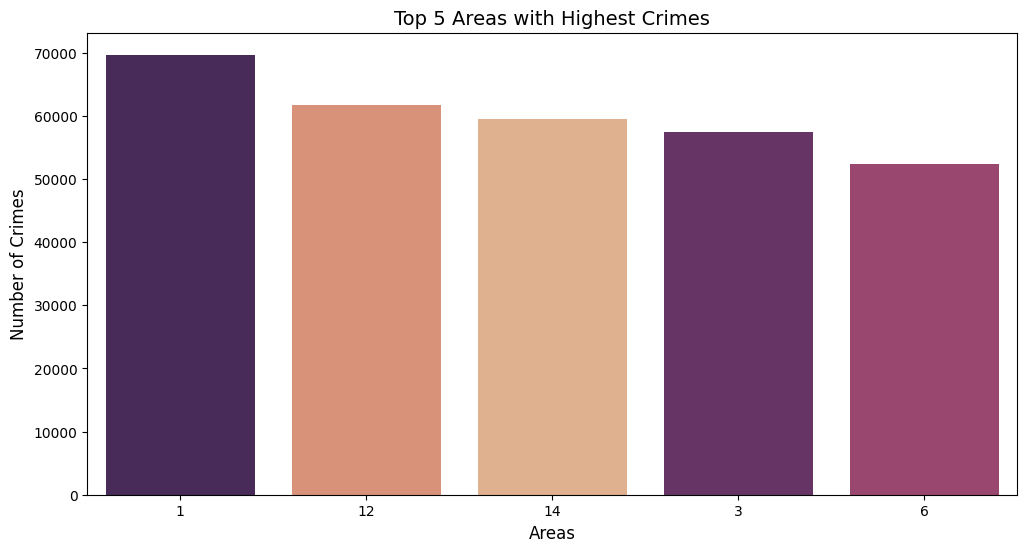

In [113]:
# top 5 areas with heighest crimes 

crime_counts = df['area'].value_counts().sort_values(ascending=False).head(5)

# declaring variable name and converting into dataframe for sort 
crime_counts_df = crime_counts.reset_index()
crime_counts_df.columns = ['Area', 'Crime Count']
crime_counts_df = crime_counts_df.sort_values(by="Crime Count", ascending=False)

plt.figure(figsize=(12, 6))
sns.barplot(x="Area", y="Crime Count", data=crime_counts_df, order=crime_counts_df["Area"], palette="flare_r",hue='Area',legend=False)

plt.title("Top 5 Areas with Highest Crimes", fontsize=14)
plt.xlabel("Areas", fontsize=12)
plt.ylabel("Number of Crimes", fontsize=12)

plt.show()


C:\Users\raksh\AppData\Local\Temp\ipykernel_15596\1891217378.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=crime_counts.values, y=crime_counts.index, palette="viridis")


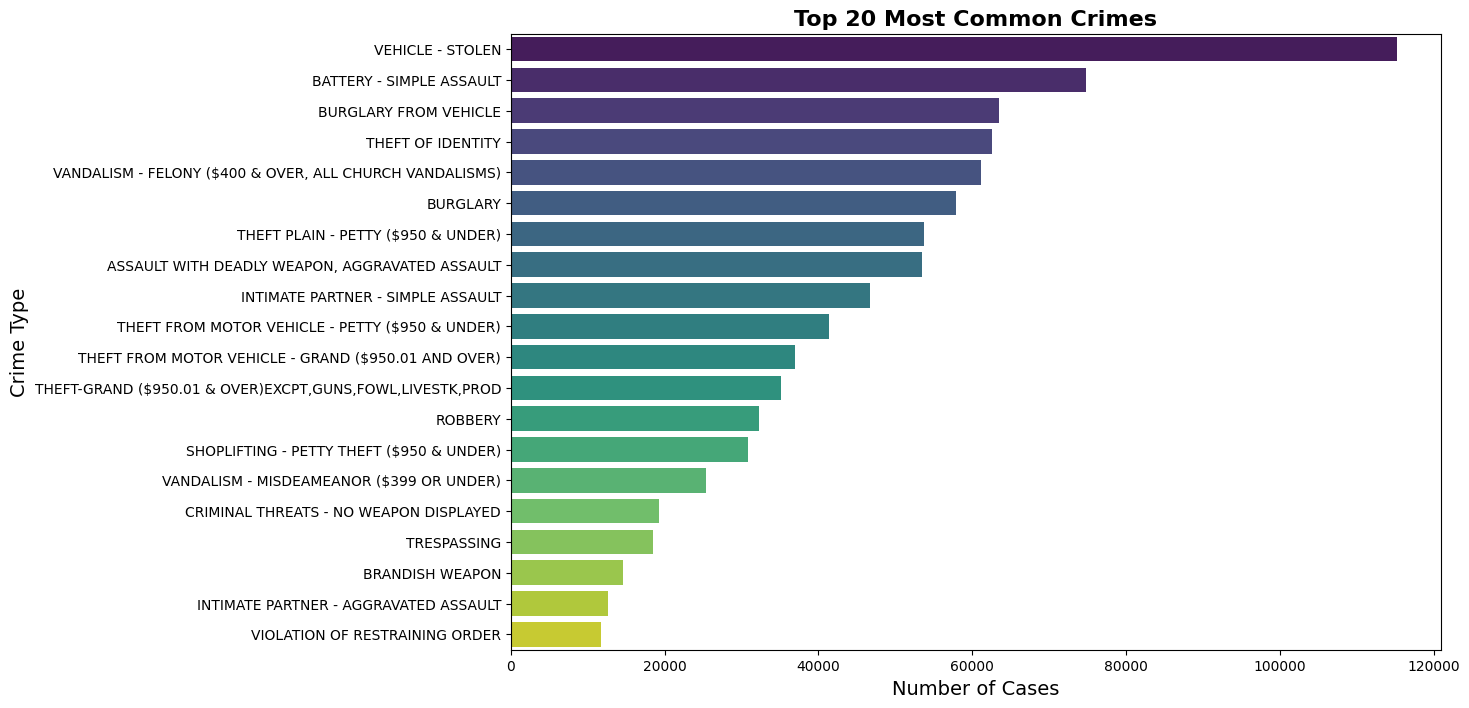

In [114]:
# top 20 most common crimes 

crime_counts = df['crm_cd_desc'].value_counts().head(20)
plt.figure(figsize=(12, 8))
sns.barplot(x=crime_counts.values, y=crime_counts.index, palette="viridis")

plt.title("Top 20 Most Common Crimes", fontsize=16, fontweight="bold")
plt.xlabel("Number of Cases", fontsize=14)
plt.ylabel("Crime Type", fontsize=14)

plt.show()


In [115]:
# If the warning is in output ( Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.
# ignore it or we can handle it by adding hue and legend 

In [116]:
# # plt.figure(figsize=(8, 8))

# sns.set(rc={'figure.figsize':(8,8)})
# data=df['status_desc'].value_counts()
# sns.barplot(data =data ,palette='mako_r')
# plt.title("Case Status")
# plt.ylabel("Number of Status")
# plt.xlabel("Status")


C:\Users\raksh\AppData\Local\Temp\ipykernel_15596\656705748.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=crime_counts.values, y=crime_counts.index, palette="viridis")


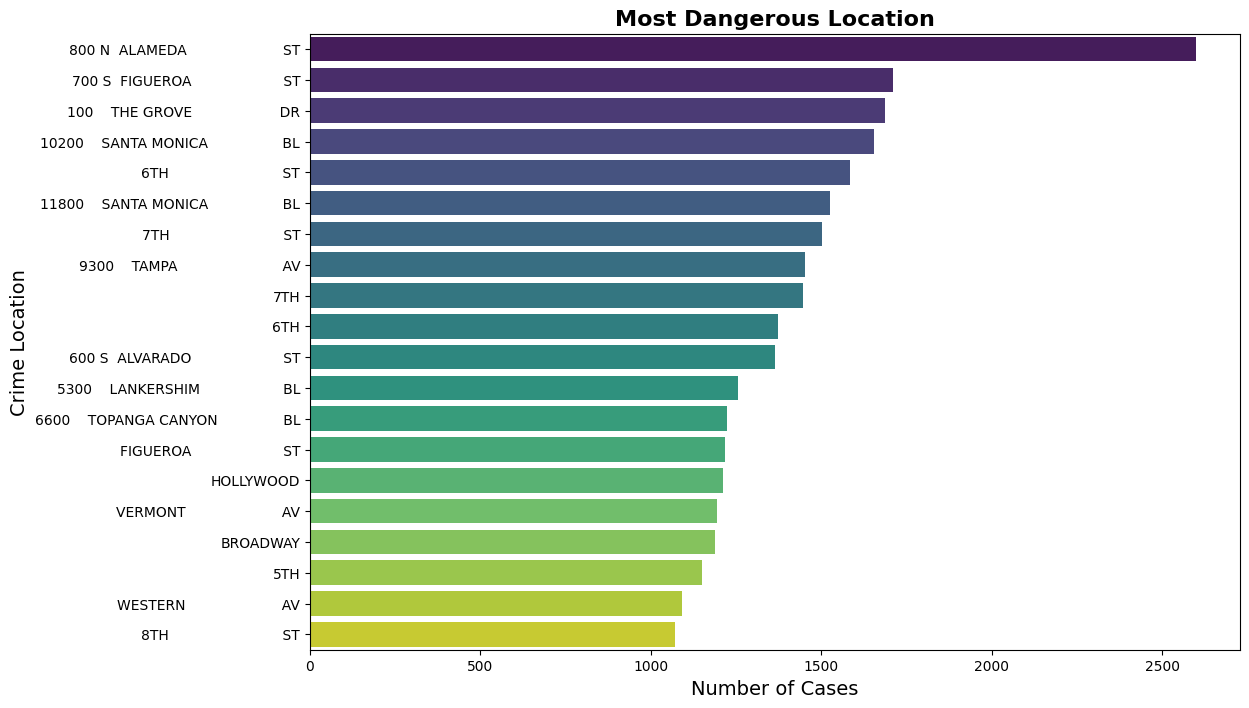

In [117]:
# Dangerous location 

crime_counts = df['location'].value_counts().head(20)
plt.figure(figsize=(12, 8))
sns.barplot(x=crime_counts.values, y=crime_counts.index, palette="viridis")

plt.title("Most Dangerous Location", fontsize=16, fontweight="bold")
plt.xlabel("Number of Cases", fontsize=14)
plt.ylabel("Crime Location", fontsize=14)

plt.show()


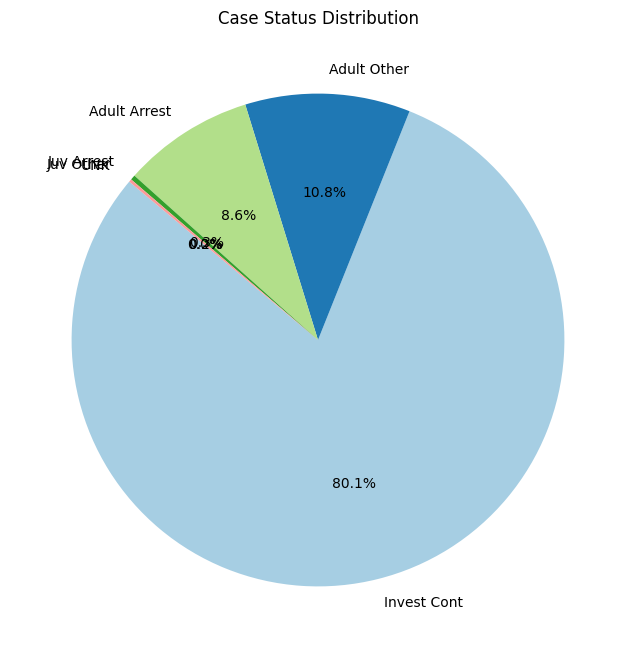

In [118]:
# case status distribution
status_counts = df['status_desc'].value_counts()

plt.figure(figsize=(8, 8))
plt.pie(status_counts, labels=status_counts.index, autopct='%1.1f%%', startangle=140, colors=plt.cm.Paired.colors)

plt.title("Case Status Distribution")
plt.show()


In [119]:
# most cases are under investigation 

<!-- lets see crime over time  -->

# lets see crime over time(years)

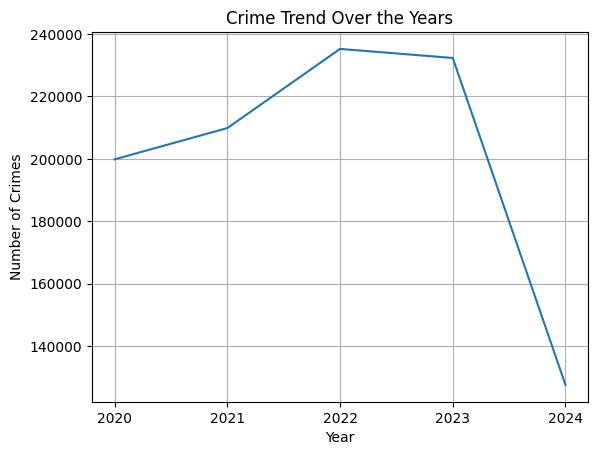

In [120]:
# Crime Trend over TIme 
crime_over_year=df[['year']].groupby('year',as_index=False).size()

sns.lineplot(x=crime_over_year['year'],y=crime_over_year['size'],markers="o")
plt.title("Crime Trend Over the Years")
plt.xlabel("Year")
plt.ylabel("Number of Crimes")
plt.grid(True)
plt.xticks(range(2020,2025,1))
plt.show()


In [121]:
# Let's determine when the crime occurs most frequently.      -> by hours

In [122]:
df['hour']=df['time_occ'].astype(str).str[0:2] # new column created for hour data 

Text(0, 0.5, 'Number of Crimes')

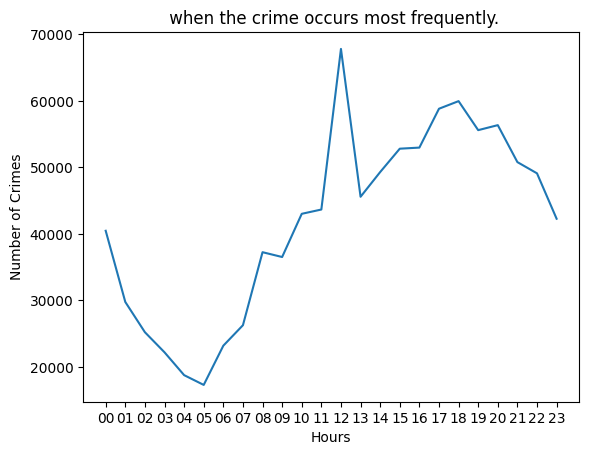

In [123]:
hour_grouped=df[['dr_no','hour']].groupby(by='hour',as_index=False).count()
sns.lineplot(x=hour_grouped['hour'],y=hour_grouped['dr_no'])

plt.title(" when the crime occurs most frequently by time.")
plt.xlabel("Hours")
plt.ylabel("Number of Crimes")



Text(0.5, 0, 'Months')

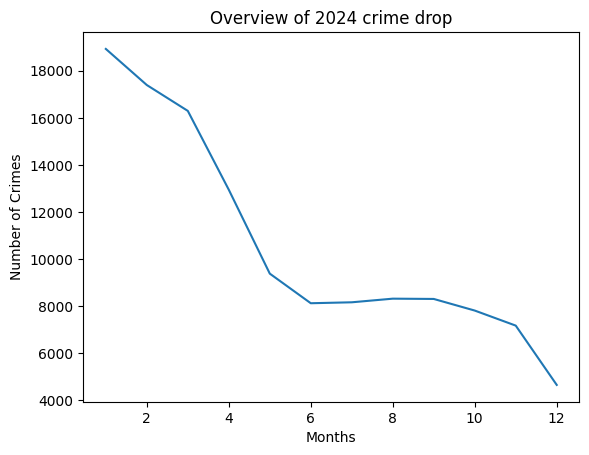

In [124]:
# overview of 2024 crime drop
data_2024=df[df['year']==2024]
group_data_2024=data_2024.groupby(by='month').size()

sns.lineplot(data=group_data_2024)
plt.title('Overview of 2024 crime drop')
plt.ylabel('Number of Crimes')
plt.xlabel('Months')

C:\Users\raksh\AppData\Local\Temp\ipykernel_15596\3876052210.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=crime_counts.values, y=crime_counts.index, palette="viridis")


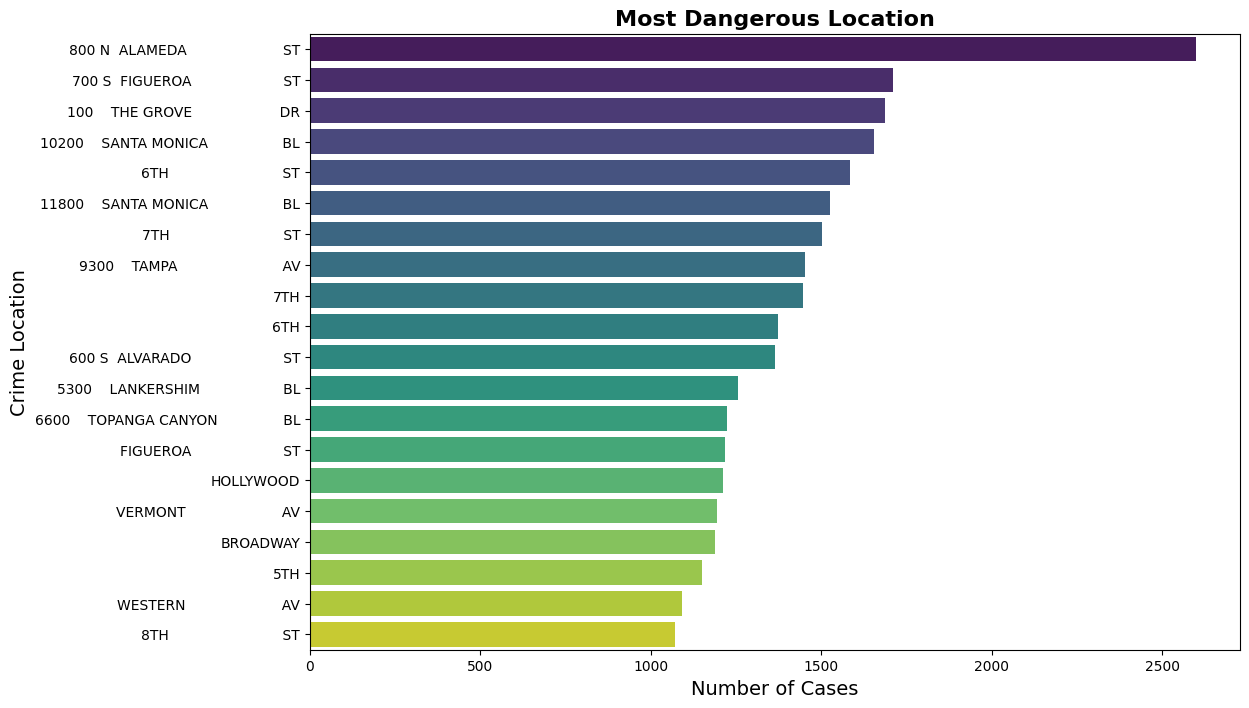

In [125]:
# most dangereous locations 

crime_counts = df['location'].value_counts().head(20)
plt.figure(figsize=(12, 8))
sns.barplot(x=crime_counts.values, y=crime_counts.index, palette="viridis")

plt.title("Most Dangerous Locations", fontsize=16, fontweight="bold")
plt.xlabel("Number of Cases", fontsize=14)
plt.ylabel("Crime Location", fontsize=14)

plt.show()


In [126]:
crime_count_all=df['area'].value_counts()


In [127]:
crime_count_all

area
1     69671
12    61752
14    59500
3     57430
6     52438
15    51106
20    50062
18    49926
13    49174
7     48238
2     46823
8     45723
11    42948
9     42877
10    42141
17    41744
5     41380
21    41366
19    40341
4     37078
16    33129
Name: count, dtype: Int64

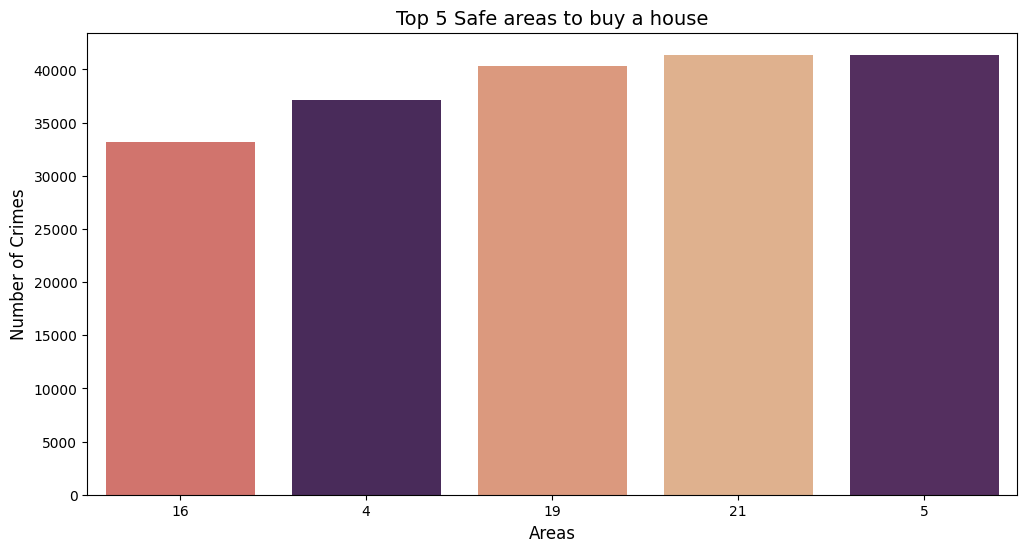

In [128]:
# safest areas 
crime_counts_safe = df['area'].value_counts().sort_values(ascending=True).head(5)

# declaring variable name and converting into dataframe for sorting 
crime_counts_df = crime_counts_safe.reset_index()
crime_counts_df.columns = ['Area', 'Crime Count']
crime_counts_df = crime_counts_df.sort_values(by="Crime Count", ascending=True)

plt.figure(figsize=(12, 6))
sns.barplot(x="Area", y="Crime Count", data=crime_counts_df, order=crime_counts_df["Area"], palette="flare_r",hue='Area',legend=False)

plt.title("Top 5 Safe areas to buy a house", fontsize=14)
plt.xlabel("Areas", fontsize=12)
plt.ylabel("Number of Crimes", fontsize=12)

plt.show()


In [129]:
# 3.82 Million POPULATION(2023)
population_2023=3820000
crime_count_2023=(df['year'].loc[df['year']==2023]).count()
crime_rate_2023=round(crime_count_2023/population_2023*100000,0)
print(crime_rate_2023," Per 100000  in 2023")
# 3.80 Million POPULATION(2024)
population_2024=3800000
crime_count_2024=(df['year'].loc[df['year']==2024]).count()
crime_rate_2024=round(crime_count_2024/population_2024*100000,0)
print(crime_rate_2024," Per 100000  in 2024")




6083.0  Per 100000  in 2023
3356.0  Per 100000  in 2024


In [130]:
# find out the drop rate 
drop_rate_2024=round(((crime_rate_2023-crime_rate_2024)/crime_rate_2023)*100,2)
drop_rate_2024

44.83

C:\Users\raksh\AppData\Local\Temp\ipykernel_15596\1360802039.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=crime_with_indians,  palette="flare_r",legend=False)


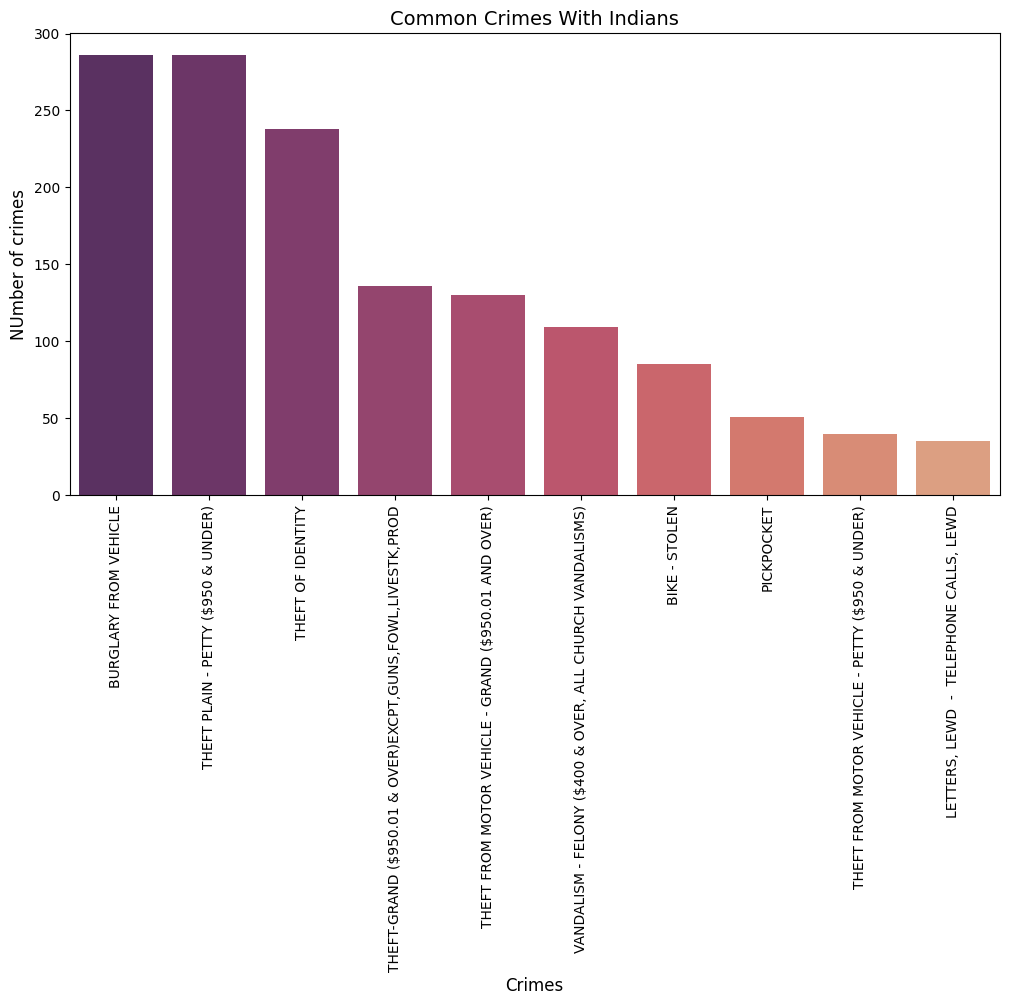

In [131]:
#  any crime pattern with indians

crime_with_indians=df.loc[(df['vict_descent']=='I') | (df['vict_descent']=='Z')]
crime_with_indians=crime_with_indians['crm_cd_desc'].value_counts().head(10)

plt.figure(figsize=(12, 6))
sns.barplot(data=crime_with_indians,  palette="flare_r",legend=False)

plt.title("Common Crimes With Indians", fontsize=14)
plt.xlabel("Crimes", fontsize=12)
plt.ylabel("NUmber of crimes", fontsize=12)
plt.xticks(rotation=90)

plt.show()

In [132]:
df.head()

,dr_no,date_rptd,date_occ,time_occ,area,area_name,rpt_dist_no,part_1-2,crm_cd_desc,mocodes,vict_age,vict_sex,vict_descent,premis_cd,status_desc,crm_cd_1,location,lat,lon,date_reported,year,month,hour
0,190326475,03/01/2020 12:00:00 AM,2020-03-01,21:30:00,7,Wilshire,784,1,VEHICLE - STOLEN,No Mocodes Given,<NA>,M,O,101.0,Adult Arrest,510.0,1900 S LONGWOOD AV,34.0375,-118.3506,2020-03-01,2020,3,21
1,200106753,02/09/2020 12:00:00 AM,2020-02-08,18:00:00,1,Central,182,1,BURGLARY FROM VEHICLE,1822 1402 0344,47,M,O,128.0,Invest Cont,330.0,1000 S FLOWER ST,34.0444,-118.2628,2020-02-09,2020,2,18
2,200320258,11/11/2020 12:00:00 AM,2020-11-04,17:00:00,3,Southwest,356,1,BIKE - STOLEN,0344 1251,19,X,X,502.0,Invest Cont,480.0,1400 W 37TH ST,34.021,-118.3002,2020-11-11,2020,11,17
3,200907217,05/10/2023 12:00:00 AM,2020-03-10,20:37:00,9,Van Nuys,964,1,SHOPLIFTING-GRAND THEFT ($950.01 & OVER),0325 1501,19,M,O,405.0,Invest Cont,343.0,14000 RIVERSIDE DR,34.1576,-118.4387,2023-05-10,2020,3,20
4,200412582,09/09/2020 12:00:00 AM,2020-09-09,06:30:00,4,Hollenbeck,413,1,VEHICLE - STOLEN,No Mocodes Given,<NA>,Unknown,X,101.0,Invest Cont,510.0,200 E AVENUE 28,34.082,-118.213,2020-09-09,2020,9,06


# Finding a Safe Area to Buy a House in Los Angeles

# Objective
The objective of this project is to identify safe residential areas in Los Angeles for potential homebuyers using recent crime data. The goal is to make data-driven decisions based on crime trends and safety indicators.

# Data Overview
Dataset Used: Crime Data from 2020 to Present (sourced from LAPD)

Key Features Analyzed: Crime Category, Location, Report Date, Area Code, Status of Investigation

Timeframe: 2020–2024

# Methodology
Data Cleaning: Removed null values, handled duplicates, and standardized date formats.

Crime Categorization: Grouped crimes by severity and frequency.

Area-wise Analysis: Crime frequency was aggregated by Area Code.

Trend Analysis: Yearly crime trends were visualized to detect changes over time.

Status of Investigation: Assessed case closure rates to determine the responsiveness of law enforcement.

# Key KPIs Considered
Total number of crimes per area

Types of crimes committed

Year-over-year crime trends

Case closure rate (investigation status)

# Key Findings
Safe Areas in Los Angeles
The following areas had consistently low crime rates across all years:

Area Codes: 16, 4, 19, 21, 5

These are considered the safest regions for buying a house based on current data.

# High-Risk Areas
The most dangerous areas with high crime frequency include:

Area Codes: 1, 12, 14, 3, 6

These areas showed a high concentration of violent and property-related crimes.

# Crime Trend in 2024
Crime rate dropped by 45% in 2024, indicating a positive shift in safety.

However, further validation over time is needed to confirm if this trend continues.

# Investigation Status
Approximately 80% of cases are still pending investigation, suggesting delays in law enforcement responses or complex cases.

# Common Crime Categories
The top recurring crime categories in Los Angeles are:

Vehicle Stolen

Simple Assault

Burglary from Vehicle

These make up a large portion of reported incidents.

# Crime Patterns Among the Indian Community
No specific or disproportionate crime pattern was found targeting Indians or related demographics.

# Conclusion & Recommendation
Based on the analysis, it is recommended to consider buying a house in Areas 16, 4, 19, 21, or 5, which demonstrate relatively low crime rates and better overall safety metrics.

Additionally, while the drop in crime rate in 2024 is promising, the high rate of pending investigations suggests continued vigilance is necessary.